In [1]:
import time
import numpy as np
import os
import os.path as op
import pandas as pd
import scipy.optimize as so
import pickle
import scipy as sp
import seaborn as sns
import glob


from idealObserver2 import io_with_derivations

import matplotlib.pyplot as plt

#from idealObserver2 import io_with_derivations

"""
Created on: May 31, 2023
Latest update: May 31, 2023
Author: @zoeheez



Description: 


"""

'\nCreated on: May 31, 2023\nLatest update: May 31, 2023\nAuthor: @zoeheez\n\n\n\nDescription: \n\n\n'

In [51]:
# import the preprocessed behavioral data
proj_dir = os.path.normpath(os.getcwd())

f1 = open(proj_dir+"/behavioral_data_preprocessed.pkl","rb")
behavioral_data_holder = pickle.load(f1)


behavioral_keys = behavioral_data_holder['sub1']['sess1'].keys()
print(f'behavioral data \n \
    data type: {type(behavioral_data_holder)} \n \
    number of subjects: {len(behavioral_data_holder)} \n \
    info included for each session: {behavioral_keys}')

behavioral data 
     data type: <class 'dict'> 
     number of subjects: 60 
     info included for each session: dict_keys(['choices', 'sequence', 'mean', 'missedresponse', 'kept', 'changepoints'])


In [86]:
io.keys()

dict_keys(['posterior', 'predictive', 'prior', 'predictive_prior', 'volatility', 'reward_levels', 'options', 'outcome_SD', 'choices', 'prior_reward_probability', 'expected_reward', 'expected_uncertainty', 'unexpected_uncertainty', 'prediction_error', 'feedback_surprise', 'signed_feedback_surprise'])

In [82]:
io['prior']

{'A': array([[3.33333333e-01, 3.33333333e-01, 3.33333333e-01],
        [3.02064114e-01, 4.50626706e-01, 2.47309180e-01],
        [7.31192965e-02, 4.77823479e-01, 4.49057225e-01],
        [8.93826738e-02, 4.68792845e-01, 4.41824482e-01],
        [1.04629590e-01, 4.60326625e-01, 4.35043785e-01],
        [1.18923574e-01, 4.52389544e-01, 4.28686882e-01],
        [1.32324184e-01, 4.44948531e-01, 4.22727285e-01],
        [1.44887256e-01, 4.37972581e-01, 4.17140163e-01],
        [1.56665136e-01, 4.31432628e-01, 4.11902236e-01],
        [1.67706898e-01, 4.25301422e-01, 4.06991680e-01],
        [1.78058550e-01, 4.19553417e-01, 4.02388033e-01],
        [5.90989278e-02, 4.32808206e-01, 5.08092867e-01],
        [2.73367339e-02, 4.37112029e-01, 5.35551237e-01],
        [5.22337587e-03, 2.78594990e-01, 7.16181634e-01],
        [2.53911190e-01, 6.20969261e-01, 1.25119549e-01],
        [4.66402100e-01, 5.13169647e-01, 2.04282526e-02],
        [4.58085302e-01, 5.01929877e-01, 3.99848201e-02],
        [

In [87]:
io['prediction_error']

{'A': array([ -2.        ,  21.09509869,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,   9.51341034,   2.02012122,
         14.83570993, -54.21916516, -22.42416717,          nan,
                 nan,  34.83938404,  -8.9404816 ,  14.49962497,
         15.83003153,  -6.70817535,          nan,          nan,
                 nan,   4.08455519,          nan,          nan,
                 nan,          nan,  -2.67838985,          nan,
                 nan,          nan,          nan,  10.6210182 ,
                 nan, -14.90945918,  30.97413826,  -5.25107988,
                 nan,  30.91270766, -45.10351298, -33.25255796,
                 nan,          nan,  -6.97453748,   4.92169998,
                 nan,          nan,  -2.48566252,          nan,
        -26.16927093,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
          0.52311304,   0.58723405,

In [88]:
io['feedback_surprise']

{'A': array([4.17677999, 4.45096267,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
        4.15216898, 4.0353069 , 4.18980467, 6.90870242, 4.48875247,
               nan,        nan, 5.15513127, 4.09814158, 4.21154236,
        4.25789621, 4.03155589,        nan,        nan,        nan,
        4.02883567,        nan,        nan,        nan,        nan,
        4.03784226,        nan,        nan,        nan,        nan,
        4.14157238,        nan, 4.2291836 , 4.97747931, 4.0230267 ,
               nan, 4.94842079, 6.00805702, 5.10982969,        nan,
               nan, 4.06524597, 4.03699947,        nan,        nan,
        3.76381022,        nan, 5.0580669 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
        3.71866692, 3.3595245 , 3.55223601,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 4.73891298,

In [84]:
io['expected_reward']

{'A': array([50.        , 48.90490131, 57.51875857, 57.04883616, 56.6082839 ,
        56.19526615, 55.80806202, 55.44505814, 55.10474201, 54.78569563,
        54.48658966, 58.97987878, 60.16429007, 64.21916516, 47.42416717,
        41.08052304, 41.63799035, 42.16061596, 52.9404816 , 50.50037503,
        53.16996847, 55.70817535, 53.53827021, 53.31712832, 53.1098078 ,
        52.91544481, 53.46727817, 53.25057329, 53.04741245, 52.85694918,
        52.67838985, 51.78514472, 51.67357318, 51.56897485, 51.47091392,
        51.3789818 , 54.17008979, 53.90945918, 50.02586174, 56.25107988,
        54.3597785 , 54.08729234, 61.10351298, 49.25255796, 42.00658486,
        42.50617331, 42.97453748, 41.07830002, 42.58813158, 43.05137336,
        43.48566252, 42.71388899, 43.16927093, 30.32506229, 31.5547459 ,
        32.70757428, 33.78835089, 34.80157896, 35.75148027, 36.64201276,
        37.47688696, 32.41276595, 30.73844349, 30.77989671, 31.98115317,
        33.1073311 , 34.1631229 , 35.15292772,

In [77]:
io['expected_reward']

{'A': array([48.90490131, 57.51875857, 57.04883616, 56.6082839 , 56.19526615,
        55.80806202, 55.44505814, 55.10474201, 54.78569563, 54.48658966,
        58.97987878, 60.16429007, 64.21916516, 47.42416717, 41.08052304,
        41.63799035, 42.16061596, 52.9404816 , 50.50037503, 53.16996847,
        55.70817535, 53.53827021, 53.31712832, 53.1098078 , 52.91544481,
        53.46727817, 53.25057329, 53.04741245, 52.85694918, 52.67838985,
        51.78514472, 51.67357318, 51.56897485, 51.47091392, 51.3789818 ,
        54.17008979, 53.90945918, 50.02586174, 56.25107988, 54.3597785 ,
        54.08729234, 61.10351298, 49.25255796, 42.00658486, 42.50617331,
        42.97453748, 41.07830002, 42.58813158, 43.05137336, 43.48566252,
        42.71388899, 43.16927093, 30.32506229, 31.5547459 , 32.70757428,
        33.78835089, 34.80157896, 35.75148027, 36.64201276, 37.47688696,
        32.41276595, 30.73844349, 30.77989671, 31.98115317, 33.1073311 ,
        34.1631229 , 35.15292772, 36.08086974,

In [6]:
example_data = behavioral_data_holder['sub1']['sess1']
example_data['choices']

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
example_data['sequence'] # this includes 'options' ('A', 'B'), and 'outcome_SD'

{'options': {'A': array([48., 70., nan, nan, nan, nan, nan, nan, nan, nan, 64., 61., 75.,
         10., 25., nan, nan, 77., 44., 65., 69., 49., nan, nan, nan, 57.,
         nan, nan, nan, nan, 50., nan, nan, nan, nan, 62., nan, 39., 81.,
         51., nan, 85., 16., 16., nan, nan, 36., 46., nan, nan, 41., nan,
         17., nan, nan, nan, nan, nan, nan, nan, 38., 33., 38., nan, nan,
         nan, nan, nan, nan, nan, nan, nan, 56., 68., 46., nan, 48., nan,
         nan, nan, nan, nan, 52., nan, 36., nan, nan, 59., 73., 82., 68.,
         67., 70., 88., 77., 55.]),
  'B': array([ nan,  nan,  50., 100.,  59.,  78.,  70.,  59.,  45.,  23.,  nan,
          nan,  nan,  nan,  nan,  35.,  33.,  nan,  nan,  nan,  nan,  nan,
          61.,  58.,  53.,  nan, 100.,  51., 100.,  66.,  nan,  58.,  91.,
          55.,  26.,  nan,  42.,  nan,  nan,  nan,  22.,  nan,  nan,  nan,
          30.,  32.,  nan,  nan,  36.,  43.,  nan,  35.,  nan,  43.,  60.,
          63.,  55.,  81.,  70.,  65.,  nan,  nan,

In [15]:
example_data['mean']

{'A': array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]),
 'B': array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])}

In [41]:
def trial_after_forced(forced_arr):
    to_return = np.zeros(len(forced_arr))
    count = 0
    for i in range(len(forced_arr)):
        if forced_arr[i]:
            to_return[i] = 0
            count = 0
        else:
            count += 1
            to_return[i] = count
            
    return to_return.astype(int)


def trial_after_cp(cp_arr):
    to_return = np.zeros(len(cp_arr))
    
    count = 0
    for i in range(len(cp_arr)):
        if cp_arr[i]:
            count = 1
        
        to_return[i] = count
        
        if count >= 1:
            count += 1
            
    return to_return.astype(int)

def outcome_change(outcome_arr):
   
    increase_from_last = np.array([outcome_arr[i] - outcome_arr[i-1] for i in range(1, len(outcome_arr))])
    increase_from_last = np.insert(increase_from_last, 0, test_outcomes[0])
    
    return increase_from_last

In [37]:
test_data = example_data['changepoints']
test_data

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [40]:
test_output = trial_after_cp(test_data)
test_output.astype(int)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        1,  2,  3,  4,  5,  6,  7,  8,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
np.array([test_data,test_output])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
        11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
        25., 26.,

In [50]:
test_outcomes = np.array([7, 2,3,4,6,1])
increase_from_last = np.array([test_outcomes[i] - test_outcomes[i-1] for i in range(1, len(test_outcomes))])
increase_from_last = np.insert(increase_from_last, 0, test_outcomes[0])
increase_from_last

array([ 7, -5,  1,  1,  2, -5])

In [171]:
# preprocess part 1/3: eliminate broken trials (e.g. with no choice), and add in outcomes and mean reward rates
# find the actual reward
nsess = 8
nsub = 60

behavioral_data_cleaned = {}
# added: types of change point (low-to-high vs. high-to-low)
for i in range(nsub):
    behavioral_data_cleaned[f'sub{i+1}'] = {}
    
    for s in range(nsess):
        behavioral_data = behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']
        
        # extract the reward outcome for each trial into a single list
        reward_list = \
        np.nan_to_num(behavioral_data['sequence']['options']['A']) + \
            np.nan_to_num(behavioral_data['sequence']['options']['B'])
        
        
        choices_new = np.nan_to_num(behavioral_data['choices']) # make nan into 0 (will filter them later with missedresponse)
        
        # reformat the true mean reward (mx, chosen, unchosen)
        mean_mx = np.array([behavioral_data['mean']['A'], behavioral_data['mean']['B']]).T
        mean_list = np.array([mean_mx[i, int(choices_new[i])] for i in range(len(choices_new))])
        mean_list_unchosen = np.array([mean_mx[i, int(1-choices_new[i])] for i in range(len(choices_new))])
        
        # make 'free', 'forced', and 'valid' trial labels
        forced_list = ~behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['missedresponse'] * ~behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['kept']


        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['choices_new'] = choices_new # filtered choices (0=option A or missed, 1=option B)
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['outcomes'] = reward_list # observed reward (0-100) 
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['mean_mx'] = mean_mx # underlying mean rewards for option A and B
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['mean_chosen'] = mean_list # underlying mean for the chosen option
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['mean_unchosen'] = mean_list_unchosen # underlying mean for the chosen option

        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['forced'] = forced_list # 
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['free'] = behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['kept']
        behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['valid'] = ~behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['missedresponse']
        
        
        # create a new pandas df to store the variable estimates
        trial_nums = np.arange(len(choices_new))
        cleaned_data = pd.DataFrame({'trial': trial_nums, 'choices': behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['choices'],
                                           
                                           'choices_new': choices_new, 'outcomes': reward_list,\
                                            'mean_A': mean_mx[:,0], 'mean_B':mean_mx[:,1],
                                     'mean_chosen': mean_list,'mean_unchosen': mean_list_unchosen,
                                           
                                           'forced': forced_list, 'free': behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['kept'],\
                                            'valid': ~behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['missedresponse'], 
                                           
                                           
                                           'SD': behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['sequence']['outcome_SD'],
                                           'changepoints': behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['changepoints']
                                           })
    
        behavioral_data_cleaned[f'sub{i+1}'][f'sess{s+1}'] = cleaned_data
        
        
        
        # categorize different types of change points
        #test_outcomes = behavioral_data['mean_chosen']
        #increase_from_last = np.array([test_outcomes[i] - test_outcomes[i-1] for i in range(1, len(test_outcomes))])
        #increase_from_last = np.insert(increase_from_last, 0, test_outcomes[0])

        #changepoint_bool = behavioral_data['changepoints']
        #behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['low-to-high'] = (increase_from_last > 0) * changepoint_bool
        #behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']['high-to-low'] = (increase_from_last < 0) * changepoint_bool

In [176]:
# create a binary pickle file 
f2 = open("behavioral_data_cleaned.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(behavioral_data_cleaned,f2)

# close file
f2.close()

In [174]:
behavioral_data_cleaned[f'sub{i+1}'][f'sess{s+1}']

,trial,choices,choices_new,outcomes,mean_A,mean_B,mean_chosen,mean_unchosen,forced,free,valid,SD,changepoints
0,0,1.0,1.0,76.0,30,70,70,30,True,False,True,20,False
1,1,0.0,0.0,11.0,30,70,30,70,True,False,True,20,False
2,2,0.0,0.0,47.0,30,70,30,70,True,False,True,20,False
3,3,1.0,1.0,43.0,30,70,70,30,True,False,True,20,False
4,4,1.0,1.0,51.0,30,70,70,30,False,True,True,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,0.0,0.0,25.0,30,30,30,30,False,True,True,10,False
92,92,1.0,1.0,42.0,30,30,30,30,False,True,True,10,False
93,93,1.0,1.0,24.0,30,30,30,30,False,True,True,10,False
94,94,0.0,0.0,18.0,30,30,30,30,False,True,True,10,False


In [112]:
def find_chosen(expected_list, choices_new):
    return np.array([expected_list[i, int(choices_new[i])] for i in range(len(choices_new))])

def find_sum(lst):
    return np.sum(lst,axis=1)
    
def find_diff(expected_list, choices_new):
    return find_chosen(expected_list, choices_new) - np.array([expected_list[i, 1-int(choices_new[i])] for i in range(len(choices_new))])

In [119]:
data_ff = pd.read_pickle('outputs_ff.p')
data_ff.keys()

dict_keys(['subnums', 'subids', 'paramnames', 'parampairnames', 'tp_idx', 'params', 'params_raw', 'params_gt10', 'mdl_accuracy', 'params_alldata', 'nobs', 'reg_avg', 'reg_std', 'reg_cor', 'params_avg', 'params_ste', 'mdl_accuracy_avg', 'mdl_accuracy_ste', 'nobs_avg', 'reg_avg_avg', 'reg_std_avg', 'reg_cor_avg', 'reg_avg_ste', 'reg_std_ste', 'reg_cor_ste'])

In [126]:
volatility

0.041666666666666664

In [159]:
len(data_ff['subnums'])

54

In [134]:
vol_fitted = data_ff['params_alldata']['vol'].to_numpy().flatten()
vol_fitted_data = pd.DataFrame({'sub': data_ff['subnums'], 'vol': vol_fitted})
vol_fitted_data.head()

,sub,vol
0,1,0.175665
1,2,0.153248
2,3,0.142093
3,4,0.111737
4,6,0.455455


In [164]:
np.array(data_ff['subnums'])[:-2]-1

array([ 0,  1,  2,  3,  5,  7,  9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59])

In [165]:
# model-based 

ncp = 4
ntrials = 96
# Option 1: use true volitality
volatility = ncp / ntrials

# option 2: use fitted volitality (from Alex)
which_variables = ['expected_reward',
                   'expected_uncertainty',
                   'unexpected_uncertainty',
                   'prediction_error']

valid_sub = np.array(data_ff['subnums'])[:-2]-1

model_based_variables = {}

for i in valid_sub:
    print(f'subject {i+1}..')
    model_based_variables[f'sub{i+1}'] = {}
    for s in range(nsess):
        args = behavioral_data_holder[f'sub{i+1}'][f'sess{s+1}']

        # get the ideal observer model-based data
        # UPDATE: as_predictors=True (the variables are calculated prior to the outcome update for the current trial)
        vol = vol_fitted_data['vol'][vol_fitted_data['sub']==i+1].to_numpy()[0]
        
        io = io_with_derivations(args['sequence'], vol=vol, which_variables=which_variables, as_predictors=True)

        expected_list = np.array([io['expected_reward']['A'], io['expected_reward']['B']]).T
        
        EU_list = np.array([io['expected_uncertainty']['A'], io['expected_uncertainty']['B']]).T
        UU_list = np.array([io['unexpected_uncertainty']['A'], io['unexpected_uncertainty']['B']]).T
        RPE_list = np.array([io['prediction_error']['A'], io['prediction_error']['B']]).T
        choices_new = args['choices_new']

        # get the expected value for the chosen option (estimated before the option is chosen)
        ER_chosen_before = np.array([expected_list[i, int(choices_new[i])] for i in range(len(choices_new))]) 
        ER_sum_before = find_sum(expected_list)
        ER_diff_before = find_diff(expected_list, choices_new)
        
        EU_chosen_before = np.array([EU_list[i, int(choices_new[i])] for i in range(len(choices_new))])
        EU_sum_before = find_sum(EU_list)
        EU_diff_before = find_diff(EU_list, choices_new)
        
        UU_chosen_before = np.array([UU_list[i, int(choices_new[i])] for i in range(len(choices_new))])
        UU_sum_before = find_sum(UU_list)
        UU_diff_before = find_diff(UU_list, choices_new)
        
        RPE = np.array([RPE_list[i, int(choices_new[i])] for i in range(len(choices_new))])

        
        # get the posterior variables (as_predictor=False)
        io = io_with_derivations(args['sequence'], vol=vol, which_variables=which_variables, as_predictors=False)
        
        expected_list = np.array([io['expected_reward']['A'], io['expected_reward']['B']]).T
        EU_list = np.array([io['expected_uncertainty']['A'], io['expected_uncertainty']['B']]).T
        UU_list = np.array([io['unexpected_uncertainty']['A'], io['unexpected_uncertainty']['B']]).T
        
        ER_chosen_after = np.array([expected_list[i, int(choices_new[i])] for i in range(len(choices_new))])
        ER_sum_after = find_sum(expected_list)
        ER_diff_after = find_diff(expected_list, choices_new)
        
        EU_chosen_after = np.array([EU_list[i, int(choices_new[i])] for i in range(len(choices_new))])
        EU_sum_after = find_sum(EU_list)
        EU_diff_after = find_diff(EU_list, choices_new)
        
        UU_chosen_after = np.array([UU_list[i, int(choices_new[i])] for i in range(len(choices_new))])
        UU_sum_after = find_sum(UU_list)
        UU_diff_after = find_diff(UU_list, choices_new)
        
        
        # create a new pandas df to store the variable estimates
        trial_nums = np.arange(len(choices_new))
        variable_estimates = pd.DataFrame({'trial': trial_nums, 'RPE': RPE,
                                           'ER_chosen_before': ER_chosen_before, 'ER_chosen_after': ER_chosen_after,\
                                            'EU_chosen_before': EU_chosen_before, 'EU_chosen_after': EU_chosen_after,
                                           'UU_chosen_before': UU_chosen_before, 'UU_chosen_after': UU_chosen_after,
                                           
                                           'ER_sum_before': ER_sum_before, 'ER_sum_after': ER_sum_after,\
                                            'EU_sum_before': EU_sum_before, 'EU_sum_after': EU_sum_after,
                                           'UU_sum_before': UU_sum_before, 'UU_sum_after': UU_sum_after,
                                           
                                           'ER_diff_before': ER_diff_before, 'ER_diff_after': ER_diff_after,\
                                            'EU_diff_before': EU_diff_before, 'EU_diff_after': EU_diff_after,
                                           'UU_diff_before': UU_diff_before, 'UU_diff_after': UU_diff_after,
                                           })
    
        model_based_variables[f'sub{i+1}'][f'sess{s+1}'] = variable_estimates
        
        # identify the switch trial
        #choices_temp = args['choices_new']
        # all the switches (including the forced trials)
        #switch_list = ~np.array([(i==0 or choices_temp[i] == choices_temp[i-1]) for i in range(len(choices_temp))]) #* args['kept']


subject 1..
subject 2..
subject 3..
subject 4..
subject 6..
subject 8..
subject 10..
subject 11..
subject 12..
subject 13..
subject 14..
subject 16..
subject 19..
subject 20..
subject 21..
subject 22..
subject 23..
subject 24..
subject 25..
subject 26..
subject 27..
subject 28..
subject 29..
subject 30..
subject 31..
subject 32..
subject 33..
subject 34..
subject 35..
subject 36..
subject 37..
subject 38..
subject 39..
subject 40..
subject 41..
subject 43..
subject 44..
subject 45..
subject 47..
subject 48..
subject 49..
subject 50..
subject 51..
subject 52..
subject 53..
subject 54..
subject 55..
subject 56..
subject 57..
subject 58..
subject 59..
subject 60..


In [177]:
# create a binary pickle file 
f = open("model_based_variables.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(model_based_variables,f)

# close file
f.close()

In [166]:
sample_data = model_based_variables[f'sub{i+1}'][f'sess{s+1}']
sample_data

,trial,RPE,ER_chosen_before,ER_chosen_after,EU_chosen_before,EU_chosen_after,UU_chosen_before,UU_chosen_after,ER_sum_before,ER_sum_after,EU_sum_before,EU_sum_after,UU_sum_before,UU_sum_after,ER_diff_before,ER_diff_after,EU_diff_before,EU_diff_after,UU_diff_before,UU_diff_after
0,0,26.000000,50.000000,62.151810,0.666667,0.343661,0.313584,0.313584,100.000000,112.151810,1.333333,1.010328,0.627167,0.627167,0.000000,12.151810,0.000000,-0.323006,0.000000,0.000000
1,1,-39.000000,50.000000,34.383988,0.666667,0.203068,0.313584,0.313584,112.151810,93.409791,1.010328,0.629821,0.627167,0.627167,-12.151810,-24.641814,0.323006,-0.223685,0.000000,0.000000
2,2,12.616012,34.383988,38.673699,0.203068,0.365944,0.313584,0.310137,93.409791,95.377648,0.629821,0.854414,0.627167,0.623720,-24.641814,-18.030249,-0.223685,-0.122525,0.000000,-0.003447
3,3,-13.703949,56.703949,50.355809,0.488470,0.548343,0.313584,0.360817,95.377648,91.943156,0.854414,0.991647,0.623720,0.670954,18.030249,8.768461,0.122525,0.105039,0.003447,0.050680
4,4,0.644191,50.355809,50.661859,0.548343,0.455161,0.360817,0.319282,91.943156,94.413330,0.991647,0.955925,0.670954,0.632865,8.768461,6.910389,0.105039,-0.045602,0.050680,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,-5.062463,30.062463,30.105769,0.003123,0.005284,0.203840,0.119890,65.652045,69.402376,0.196801,0.320636,0.405631,0.433474,-5.527118,-9.190838,-0.190555,-0.310069,0.002049,-0.193693
92,92,2.703393,39.296607,37.171941,0.315353,0.349822,0.313584,0.270974,69.402376,72.395426,0.320636,0.525244,0.433474,0.446988,9.190838,1.948456,0.310069,0.174400,0.193693,0.094960
93,93,-13.171941,37.171941,30.474735,0.349822,0.023732,0.270974,0.104304,72.395426,69.499423,0.525244,0.325525,0.446988,0.417887,1.948456,-8.549953,0.174400,-0.278061,0.094960,-0.209280
94,94,-21.024688,39.024688,30.080527,0.301793,0.004025,0.313584,0.065967,69.499423,65.578063,0.325525,0.193150,0.417887,0.283409,8.549953,-5.417008,0.278061,-0.185099,0.209280,-0.151476


In [157]:
sample_data = model_based_variables[f'sub{i+1}'][f'sess{s+1}']
sample_data

,trial,RPE,ER_chosen_before,ER_chosen_after,EU_chosen_before,EU_chosen_after,UU_chosen_before,UU_chosen_after,ER_sum_before,ER_sum_after,EU_sum_before,EU_sum_after,UU_sum_before,UU_sum_after,ER_diff_before,ER_diff_after,EU_diff_before,EU_diff_after,UU_diff_before,UU_diff_after
0,0,-2.000000e+00,50.000000,48.904901,0.666667,0.549373,0.320471,0.320471,100.000000,98.904901,1.333333,1.216040,0.640942,0.640942,0.000000,-1.095099,0.000000,-0.117293,0.000000,0.000000
1,1,2.109510e+01,48.904901,58.048133,0.549373,0.523469,0.320471,0.320471,98.904901,108.048133,1.216040,1.190135,0.640942,0.640942,-1.095099,8.048133,-0.117293,-0.143198,0.000000,0.000000
2,2,7.105427e-15,50.000000,50.000000,0.666667,0.548137,0.320471,0.320471,108.048133,105.927476,1.190135,1.109338,0.640942,0.646983,-8.048133,-5.927476,0.143198,-0.013064,0.000000,-0.006041
3,3,5.000000e+01,50.000000,66.509671,0.548137,0.168917,0.320471,0.342880,105.927476,120.875276,1.109338,0.757907,0.646983,0.663351,-5.927476,12.144066,-0.013064,-0.420074,-0.006041,0.022409
4,4,-7.509671e+00,66.509671,63.859235,0.168917,0.267935,0.342880,0.308549,120.875276,117.074517,0.757907,0.877393,0.663351,0.629020,12.144066,10.643953,-0.420074,-0.341523,0.022409,-0.011922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,-2.563417e+00,69.563417,69.381513,0.021751,0.030807,0.038144,0.033275,117.699749,118.008915,0.622834,0.649171,0.358615,0.353746,21.427084,20.754110,-0.579332,-0.587557,-0.282327,-0.287196
92,92,6.184873e-01,69.381513,69.632516,0.030807,0.018338,0.033275,0.023242,118.008915,118.621593,0.649171,0.649430,0.353746,0.343713,20.754110,20.643438,-0.587557,-0.612754,-0.287196,-0.297229
93,93,1.836748e+01,69.632516,69.990762,0.018338,0.000462,0.023242,0.005799,118.621593,119.246215,0.649430,0.640927,0.343713,0.326270,20.643438,20.735310,-0.612754,-0.640004,-0.297229,-0.314672
94,94,7.009238e+00,69.990762,69.928745,0.000462,0.003561,0.005799,0.005587,119.246215,119.380383,0.640927,0.650930,0.326270,0.326058,20.735310,20.477107,-0.640004,-0.643809,-0.314672,-0.314884


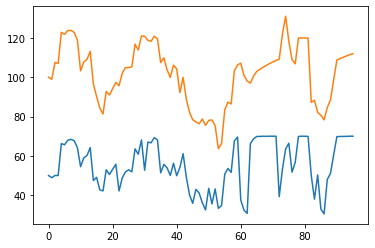

In [111]:

plt.plot(sample_data['ER_chosen_before'])
plt.plot(sample_data['ER_sum_before'])